In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

In [5]:
def bilinear_interpolate(r, c ,I):
    kiri_c = int(c)
    kanan_c = kiri_c+1
    nilai_kiri_c = c - kiri_c
    nilai_kanan_c = 1 - nilai_kiri_c
    atas_r = int(r)
    bawah_r = atas_r + 1
    nilai_atas_r = r - atas_r
    nilai_bawah_r = bawah_r - r
    
    if kiri_c >= 0 and kanan_c < I.shape[1] and atas_r >= 0 and  bawah_r < I.shape[0]:
        a = nilai_kanan_c * I[atas_r , kiri_c] + nilai_kiri_c * I[atas_r, kanan_c]
        b = nilai_kiri_c * I[bawah_r , kanan_c] + nilai_kanan_c * I[bawah_r, kiri_c]
        c = nilai_atas_r * b + nilai_bawah_r * a
        return np.int32(c)
    else:
        return 0
    
    

In [6]:
def ukuran_asli_rgb(gambar) :
    dpi = mpl.rcParams['figure.dpi']
    h, w = gambar.shape[0:2]
    figsize = h/float(dpi), w/float(dpi)
    fgr = plt.figure(figsize = figsize)
    plt.imshow(gambar, cmap = 'gray')
    plt.show()


In [7]:
def rotasi_frameAffine_projective(rumus, rmax, cmax):

    rmin = 0
    cmin = 0

    sudutgam = np.array([[rmin, cmin, 1], [rmin, cmax-1, 1], [rmax, cmax-1, 1], [rmax-1, cmin, 1]])

    gambar_dash = rumus.dot(sudutgam.T)
    gambar_dash = gambar_dash/gambar_dash[2,:]
    
    dashMin = gambar_dash.min(axis=1)
    dashMax = gambar_dash.max(axis=1)


    rMin = np.int64(np.floor(dashMin[0]))
    cMin = np.int64(np.floor(dashMin[1]))
    rMax = np.int64(np.ceil(dashMax[0]))
    cMax = np.int64(np.ceil(dashMax[1]))

    h, w = rMax - rMin + 1 , cMax - cMin + 1 

#     wadah = np.zeros((h,w),dtype='int64')
#     wadah
    return h, w, rMin, cMin, rMax, cMax

In [8]:
def f_transformasiAffine_projective(rumus,img):
    rmax = img.shape[0]
    cmax = img.shape[1]
    h, w, rMin, cMin, rMax, cMax = rotasi_frameAffine_projective(rumus, rmax, cmax )
    hasil = np.zeros((h,w), dtype ='int64')
    Tinv = np.linalg.inv(rumus)
    for new_i in range(rMin, rMax):
        for new_j in range(cMin, cMax):
            P_dash = np.array([new_i,new_j,1])
            P = Tinv.dot(P_dash)
            P = P/P[2]
    #         P = np.int16(np.floor(P))
            i , j = P[0] , P[1]
            if i < 0 or i>=rmax or j<0 or j>=cmax:
                pass
            else:
                g = bilinear_interpolate(i, j, img)
                hasil[new_i-rMin,new_j-cMin] = g
    return hasil

In [9]:
grayI = plt.imread('albert-einstein_gray.jpg')
warnaI = plt.imread('tulips.jpg')
affineI = plt.imread('affineImage.jpg')
projectiveI = plt.imread('affineProjective.jpg')

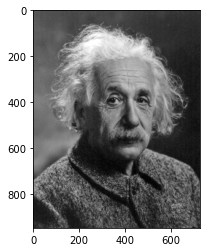

In [10]:
plt.imshow(grayI, cmap='gray')

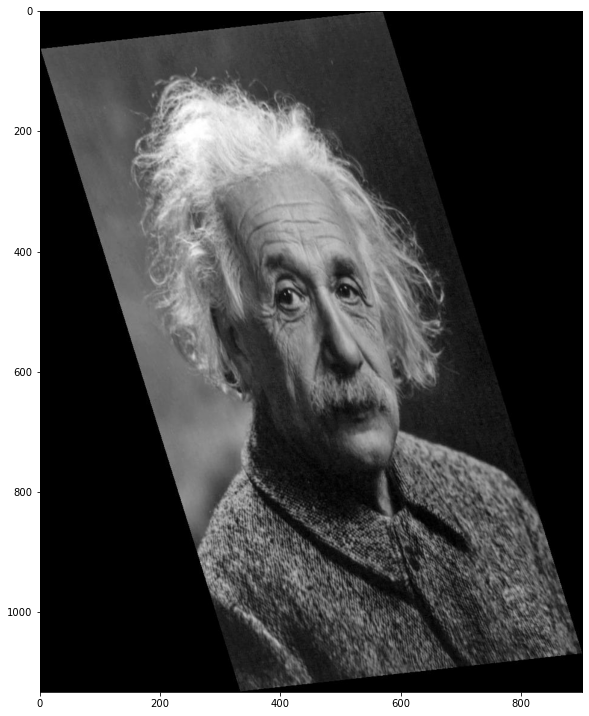

In [11]:
ukuran_asli_rgb(affineI)

In [12]:
def getPoints(I, banyak):
    %matplotlib
    fig,ax = plt.subplots(1,figsize=(15,30))
    plt.imshow(I, cmap='gray')
    pts = np.round(np.array(plt.ginput(n=banyak)))
    pts = pts[:,[1,0]].T
    plt.close()
    return pts

In [13]:
P = getPoints(grayI,3)

Using matplotlib backend: Qt5Agg


In [14]:
P

array([[400., 398., 636.],
       [322., 496., 427.]])

In [15]:
P_dash = getPoints(affineI, 3)

Using matplotlib backend: Qt5Agg


In [16]:
P_dash

array([[488., 475., 743.],
       [391., 533., 557.]])

In [17]:
P = np.vstack((P,np.ones((1,3))))

In [18]:
P

array([[400., 398., 636.],
       [322., 496., 427.],
       [  1.,   1.,   1.]])

In [19]:
P_dash = np.vstack((P_dash,np.ones((1,3))))

In [20]:
P_dash

array([[488., 475., 743.],
       [391., 533., 557.],
       [  1.,   1.,   1.]])

In [21]:
estimasi = P_dash.dot(np.linalg.inv(P))

In [22]:
estimasi

array([[ 1.10808257e+00, -6.19760624e-02,  6.47232640e+01],
       [ 3.38566652e-01,  8.19983525e-01, -8.46135582e+00],
       [ 0.00000000e+00,  7.86046575e-19,  1.00000000e+00]])

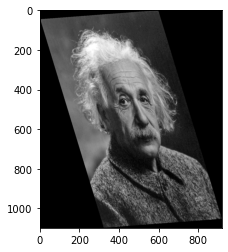

In [23]:
%matplotlib inline
jadi = f_transformasiAffine_projective(estimasi,grayI)
plt.imshow(jadi, cmap='gray')

In [24]:
p2 = getPoints(grayI,5)

Using matplotlib backend: Qt5Agg


In [25]:
p2

array([[403., 400., 396., 400., 638.],
       [320., 379., 453., 501., 425.]])

In [26]:
p2_dash = getPoints(grayI,5)

Using matplotlib backend: Qt5Agg


In [28]:
p2 = np.vstack((p2,np.ones((1,5))))

In [29]:
p2

array([[403., 400., 396., 400., 638.],
       [320., 379., 453., 501., 425.],
       [  1.,   1.,   1.,   1.,   1.]])

In [30]:
p2_dash = np.vstack((p2_dash,np.ones((1,5))))

In [31]:
p2_dash

array([[398., 395., 396., 401., 638.],
       [322., 379., 448., 496., 427.],
       [  1.,   1.,   1.,   1.,   1.]])

In [35]:
estimasi2 = p2_dash.dot(p2.T).dot(np.linalg.inv(p2.dot(p2.T)))

In [36]:
i2 = f_transformasiAffine_projective(estimasi,grayI)

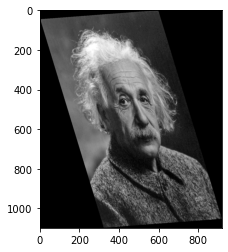

In [38]:
%matplotlib inline
plt.imshow(i2, cmap='gray')

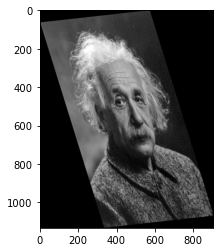

In [39]:
plt.imshow(affineI, cmap='gray')

In [40]:
def f_computeRightNullSpace(A):
    B = A.T.dot(A)
    w,v = np.linalg.eig(B)
    idx = np.argmin(w)
    nullVector = v[:,idx]
    return nullVector
    

In [41]:
A = np.random.rand(3,4)

In [42]:
nv = f_computeRightNullSpace(A)
nv

array([ 0.56524921, -0.22127106, -0.50062369,  0.61717774])

In [43]:
A.dot(nv)

array([ 2.77555756e-16, -6.93889390e-16,  6.93889390e-17])

In [45]:
P = getPoints(grayI,6)

Using matplotlib backend: Qt5Agg


In [47]:
P_dash = getPoints(projectiveI,6)

Using matplotlib backend: Qt5Agg


In [48]:
P = np.vstack((P,np.ones((1,6))))
P_dash = np.vstack((P_dash,np.ones((1,6))))

In [49]:
A = np.zeros((12,9))

In [50]:
A[::2,:3] = -P.T
A[1::2,3:6] = -P.T
A[::2,6:] = P.dot(np.diag(P_dash[0,:])).T
A[1::2,6:] = P.dot(np.diag(P_dash[1,:])).T

In [51]:
h = f_computeRightNullSpace(A)

In [52]:
h

array([-2.06586690e-02,  1.56804045e-03, -9.99522367e-01, -6.34010317e-03,
       -1.35641113e-02,  1.36007508e-03, -1.74256641e-05, -1.42165692e-06,
       -1.73137754e-02])

In [53]:
H = np.reshape(h,(3,3))

In [54]:
H

array([[-2.06586690e-02,  1.56804045e-03, -9.99522367e-01],
       [-6.34010317e-03, -1.35641113e-02,  1.36007508e-03],
       [-1.74256641e-05, -1.42165692e-06, -1.73137754e-02]])

In [55]:
I2=f_transformasiAffine_projective(H,grayI)

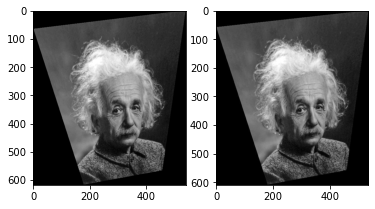

In [56]:
%matplotlib inline
plt.subplot(121)
plt.imshow(I2,cmap='gray')
plt.subplot(122)
plt.imshow(projectiveI,cmap='gray')
plt.show()

In [57]:
im1 = cv2.imread(r'C:\Users\DeLL\Desktop\ML\CV\images\1.jpg')
im2 = cv2.imread(r'C:\Users\DeLL\Desktop\ML\CV\images\2.jpg')
im3 = cv2.imread(r'C:\Users\DeLL\Desktop\ML\CV\images\3.jpg')

TypeError: 'NoneType' object is not subscriptable

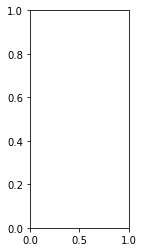

In [58]:
plt.subplot(131)
plt.imshow(im1[:,:,::-1])
plt.subplot(132)
plt.imshow(im2[:,:,::-1])
plt.subplot(133)
plt.imshow(im3[:,:,::-1])
plt.show()

In [59]:
imgs = []
imgs.append(im1)
imgs.append(im2)
imgs.append(im3)

In [60]:
M = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)
status,pano = M.stitch(imgs)

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
plt.imshow(pano[:,:,::-1])